<a href="https://colab.research.google.com/github/lmly303/Ml-Learning/blob/main/standardizing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import fetch_california_housing

In [34]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [30]:
dataset = pd.DataFrame(df.data)

In [55]:
dataset.columns = df.feature_names

In [33]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
# independent features and dependent features
X = dataset
y = df.target

In [57]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

Key Difference

fit_transform()

**What it does?**	Learns and applies transformation

**When to use?** On training data

transform()

**What it does?** Only applies transformation

**When to use?** On test/new data

To Convert the data to original values use **scaler.inverse_transform()**

In [60]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [69]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [63]:
np.mean(mse)

np.float64(-0.5268253746355748)

In [70]:
reg_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [65]:
reg_pred

array([75.39904685, 77.64758448, 81.9468823 , ..., 74.04218911,
       71.25418692, 74.51758511])

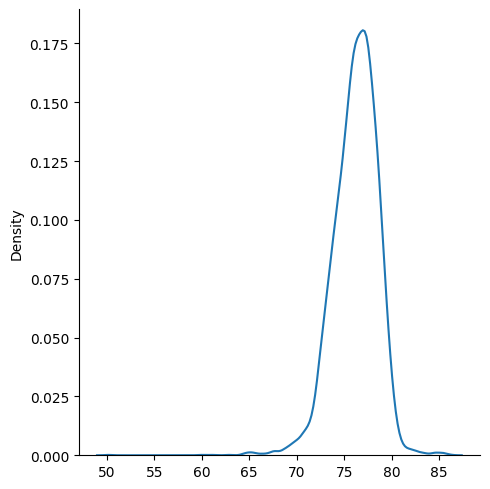

In [68]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')